#  Recusrion with Top Down
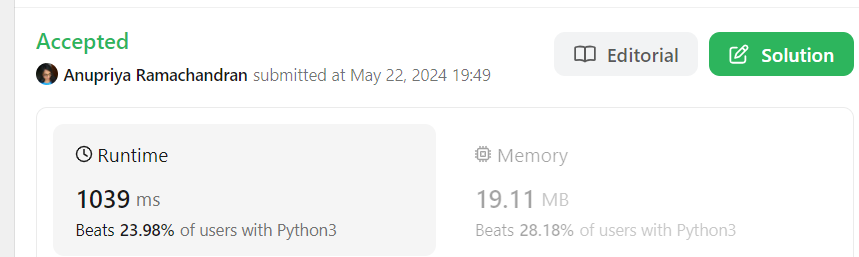

In [3]:
from typing import List
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount == 0:
            return 0
        dp = [[-1 for _ in range(amount + 1)]for _ in range(len(coins) + 1)]
        coins =  self.helper(coins, amount, len(coins) - 1, dp)
        return  coins if coins != math.inf else -1
    
    
    def helper(self, coins, amount, idx, dp):
        if amount == 0:
            return 0

        if idx == 0:
            if amount % coins[0] == 0:
                return amount//coins[0]
            else:
                return math.inf

        if idx < 0:
            return 0

        if dp[idx][amount] == -1:
            pick = math.inf
            if coins[idx] <= amount:
                pick = 1 + self.helper(coins, amount - coins[idx], idx, dp)
            notpick  = self.helper(coins, amount, idx -1, dp)
            dp[idx][amount] = min(pick, notpick)
        return dp[idx][amount]

# Bottom Up 
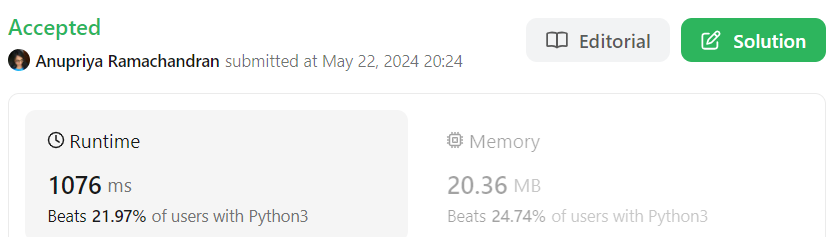

In [4]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount == 0:
            return 0
            
        n = len(coins)
        dp = [[0 for _ in range(amount + 1)]for _ in range(len(coins) + 1)]

        for j in range(amount + 1):
            if j % coins[0] == 0:
                dp[0][j] = j//coins[0]
            else:
                dp[0][j] = math.inf

        for i in range(1, n):
            for j in range(1, amount+1):
                notpick = dp[i-1][j]
                pick = math.inf     # imp step
                if coins[i] <= j:
                    pick = 1 + dp[i][j-coins[i]]
                dp[i][j] = min(pick, notpick)

        return dp[n-1][amount] if dp[n-1][amount] != math.inf else -1      # choose n-1, amount


# Space Optimization

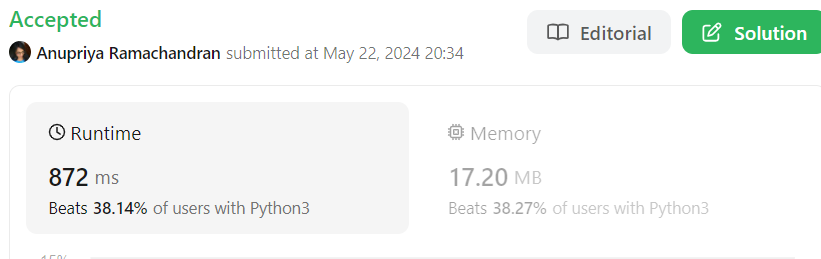

In [5]:
class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        if amount == 0:
            return 0
            
        n = len(coins)
        prev = [0 for _ in range(amount + 1)]
        cur = [0 for _ in range(amount + 1)]

        for j in range(amount + 1):
            if j % coins[0] == 0:
                prev[j] = j//coins[0]
            else:
               prev[j] = math.inf

        for i in range(1, n):
            for j in range(1, amount+1):
                notpick = prev[j]
                pick = math.inf
                if coins[i] <= j:
                    pick = 1 + cur[j-coins[i]]
                cur[j] = min(pick, notpick)
            prev = cur

        return prev[amount] if prev[amount] != math.inf else -1